In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 정규선형모델

## 연속형 독립변수가 하나인 모델(단순회귀)

### 분석 준비

In [ ]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

### 데이터 불러오기

In [ ]:
# 가공의 맥주 매상 데이터 불러오기
beer = pd.read_csv("/content/drive/MyDrive/StatsCraftLab/practice/data/5-1-1-beer.csv")
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


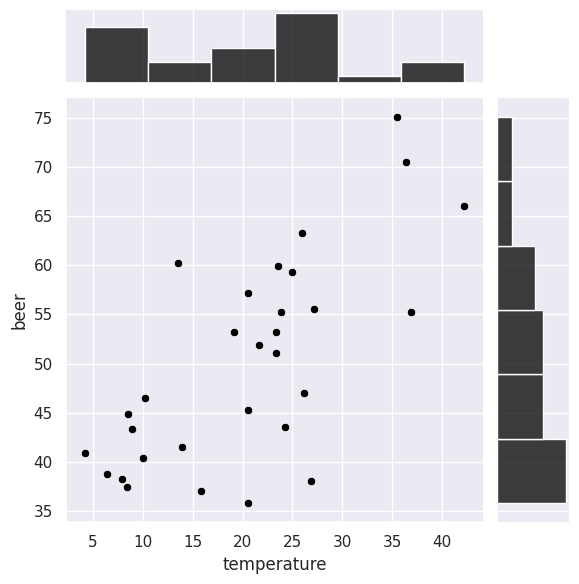

In [ ]:
# 산포도 및 분포 'jointplot'
sns.jointplot(x = "temperature", y = "beer",
              data = beer, color = 'black')

### statsmodels 를 이용한 모델링

In [ ]:
# 모델 구축
# statsmodels.formula.api을 사용하면 회귀모델 공식을 먼저 작성한 후 공식에 따라 회귀분석을 시행한다.
# 상수항 추가나 범주형 변수의 더미변수화를 자동으로 해결해주는 장점이 있다.
lm_model = smf.ols(formula = "beer ~ temperature",
                   data = beer).fit()

### 추정 결과 표시와 계수 검정

In [ ]:
# 추정 결과
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           1.11e-05
Time:                        13:52:35   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Intercept 는 상수항에 해당한다.
- 그 밑 temperature 는 독립변수 'temperature' 에 해당한다.
- 'coef' 라고 쓰여진 줄이 계숫값(가중치)이다. 그 다음 표준편차, t값, 귀무가설에 대한 p-value  등을 나타낸다.
- Dep.Variable: 종속변수의 이름. Dep은 Depended의 약자로, 종속변수라는 의미
- Model, Method: 범용최소제곱법을 사용했다는 설명
- Date, Time: 모델을 추정한 일시
- No. Observations: 샘플사이즈
- Df Residuals: 샘플 사이즈에서 추정된 파라미터 수를 뺀 값
- Df Model: 사용된 독립변수의 수
- Covariance Type: 공분산 타입. 특별히 지정하지 않으면  nonrobust가 된다.
- R-squared, Ajd. R-squared: 결정계수와 자유도 조정이 끝난 결정계수
- F-statistic, Prob (F-statistic): 분산분석 결과.
- Log-Likelihood: 최대로그우도
- AIC: 아케이케 정보 기준
- BIC: 베이즈 정보 기준

### AIC 를 이용한 모델 선택

In [ ]:
# NULL모델
null_model = smf.ols("beer ~ 1", data = beer).fit()

In [ ]:
# NULL 모델의 AIC
null_model.aic

227.94194972563105

In [ ]:
# 독립변수가 있는 모델의 AIC
lm_model.aic

208.90902935575437

In [ ]:
# 독립변수가 있는 추정모델의 로그우도
lm_model.llf

-102.45451467787719

In [ ]:
# 독립변수의 수
lm_model.df_model

1.000

In [ ]:
# AIC (-2 * (로그우도 - 독립변수의 수 + 1(절편)))
-2*(lm_model.llf - (lm_model.df_model + 1))

208.90902935575437

### 회귀직선
- 회귀변수는 모델에 의한 종속변수의 추측값을 직선으로 표시한 것
- 비선형 모델의 경우 회귀 곡선이라고 부른다.

### seaborn 을 이용한 회귀직선 그래프 그리기

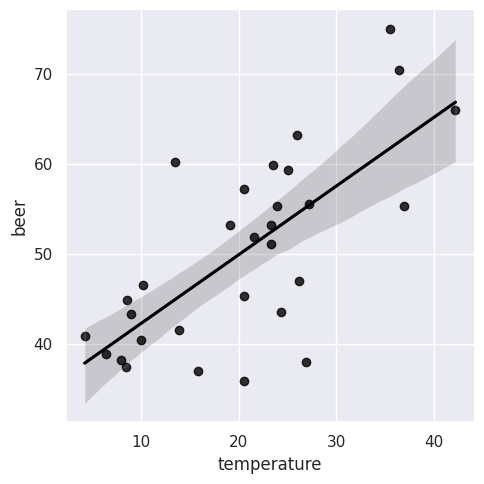

In [ ]:
# 산포도 디자인: 'scatter_kws'
# 회귀직선의 디자인: 'line_kws'
# 음영 부분은 회귀직선의 95% 신뢰구간
sns.lmplot(x = "temperature", y = "beer", data = beer,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

### 모델을 이용한 예측

In [ ]:
# 예측값
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [ ]:
# 기온(temperature)이 '0'도일 때의 맥주 매상의 기댓값(예측값)
# 이 모델의 파라미터는 독립변수 온도와 상수항이다. 여기서 온도값을 0으로 주면 상수항 값을 출력하게 되는 것과 같다.
lm_model.predict(pd.DataFrame({"temperature":[0]}))

0    34.610215
dtype: float64

In [ ]:
# 추정한 파라미터 표시
# 위 추정된 상수항 값과 적용된 상수항 값이 일치하는 것을 확인할 수 있다.
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [ ]:
# 기온(temperature)이 '20'도일 때의 맥주 매상의 기댓값(예측값)
lm_model.predict(pd.DataFrame({"temperature":[20]}))

0    49.918767
dtype: float64

In [ ]:
# 예측값을 추정한 상수항 값과 독립변수의 계수를 이용하여 산출
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20

beta0 + beta1 * temperature

49.918767010950546

### 잔차 계산
- 정규선형모델의 경우 잔차가 '평균이 0인 정규분포'를 따른다.
- 모델이 그 분포를 따르고 있는지 체크하는 것이 모델의 평가방법이다.

In [ ]:
# 모델의 잔차
resid = lm_model.resid
resid.head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [ ]:
# 잔차를 직접 계산
# residual = y - pred
# pred = Intercept + temperature.coef * temperature
y_hat = beta0 + beta1 * beer.temperature
y_hat.head(3)

0    50.301481
1    53.745905
2    42.264491
Name: temperature, dtype: float64

In [ ]:
# fittedvalues 를 이용한 잔차 출력
lm_model.fittedvalues.head(3)

0    50.301481
1    53.745905
2    42.264491
dtype: float64

In [ ]:
# 잔차 확인 (lm_model.resid 와 이치)
(beer.beer - y_hat).head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

### 결정계수
- R-squared 를 결정계수라 불리는 지표이다.
- 결정계수는 가지고 있는 데이터에 의해 모델을 적용했을 때의 적합도를 평가한 지표이다.
- 모델에 의한 추측치가 종속변수의 실젯값과 일치하면 R^2 은 1이 된다.
- 결정계수는 상관계수(correlation coefficient)의 제곱과 같다.
- https://datalabbit.tistory.com/54

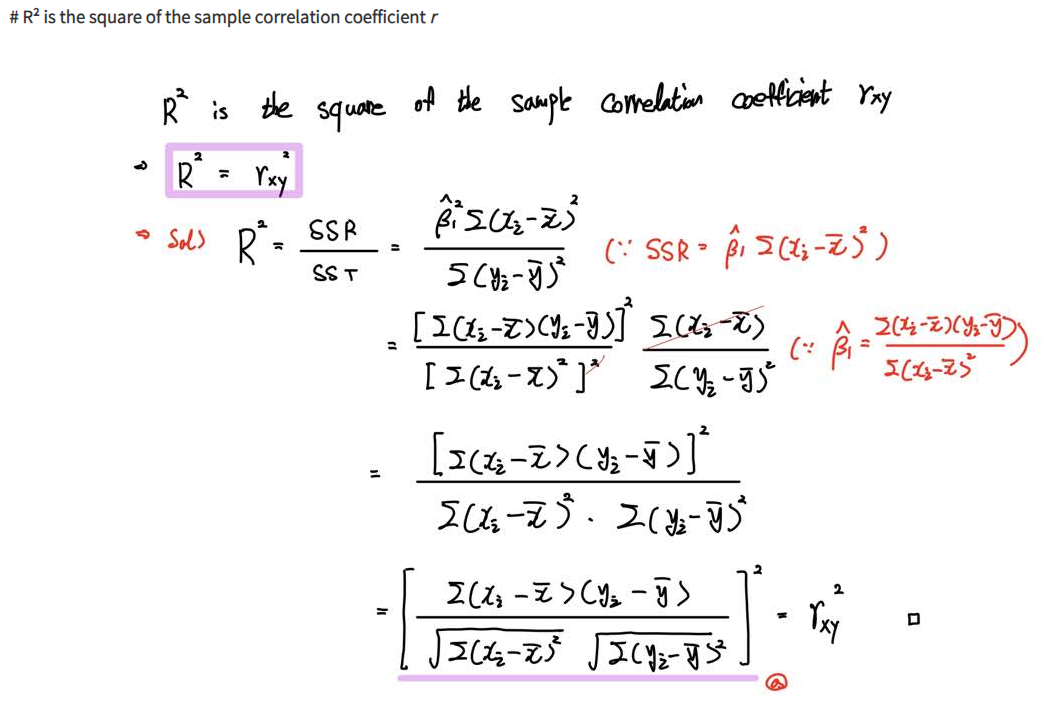

In [ ]:
# 결정계수 직접계산
mu = sp.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()

sp.sum((yhat - mu)**2) / sp.sum((y - mu)**2)

<ipython-input-23-7af3b87ff640>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mu = sp.mean(beer.beer)
<ipython-input-23-7af3b87ff640>:6: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum((yhat - mu)**2) / sp.sum((y - mu)**2)


0.5039593230611875

In [ ]:
# 함수의 rsquared 를 이용해 결정계수 출력
lm_model.rsquared

0.5039593230611858

In [ ]:
# (종속변숫값의 변동 크기)^2 = (설명 가능한 변동)^2 + (설명 못하는 변동(잔차))^2
# sum((y - mu)^2) = sum((yhat - mu)^2) + sum((residual)^2)

# (종속변숫값의 변동 크기)^2 == (sum(y - mu)^2)
sp.sum((yhat - mu)**2) + sum(resid**2)

<ipython-input-25-766658ee4651>:5: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum((yhat - mu)**2) + sum(resid**2)


3277.114666666671

In [ ]:
sp.sum((y - mu)**2)

<ipython-input-26-0c5d7676ab88>:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum((y - mu)**2)


3277.1146666666655

In [ ]:
# 결정계수 (R^2)
1 - sp.sum(resid**2) / sp.sum((y - mu)**2)

<ipython-input-27-8865748b63be>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  1 - sp.sum(resid**2) / sp.sum((y - mu)**2)


0.5039593230611857

### 수정된 결정계수
- 독립변수의 수가 늘어나는 것에 대해 패널티를 적용한 결정계수를 '수정된 결정계수'라고 한다.
- 독립변수가 늘어나면 결정계수는 큰 값이 되고, 과적합을 일으킬 수 있다.

In [ ]:
n = len(beer.beer)
s = 1  # s 는 독립변수의 수
1 - ((sp.sum(resid**2) / (n - s - 1)) /
    (sp.sum((y - mu)**2) / (n - 1)))

<ipython-input-28-64a39e4b4a6b>:3: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  1 - ((sp.sum(resid**2) / (n - s - 1)) /
<ipython-input-28-64a39e4b4a6b>:4: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  (sp.sum((y - mu)**2) / (n - 1)))


0.48624358459908523

In [ ]:
# 모델의 함수로 수정된 결정계수 출력
lm_model.rsquared_adj

0.48624358459908534

### 잔차 그래프

<ipython-input-30-066707b9f14f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid, color = 'black')


<Axes: ylabel='Density'>

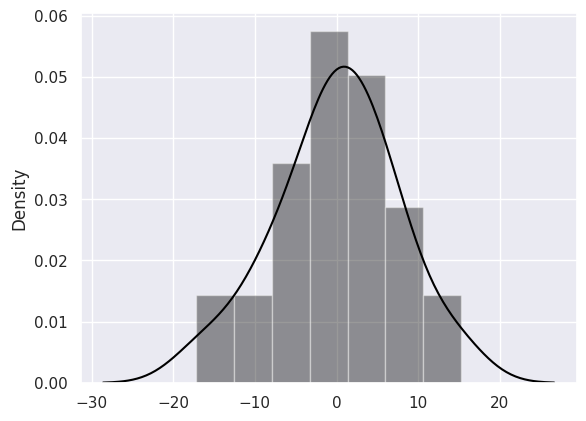

In [ ]:
# 잔차의 히스토그램
# 잔차가 정규분포를 띄는지 확인한다.
sns.distplot(resid, color = 'black')

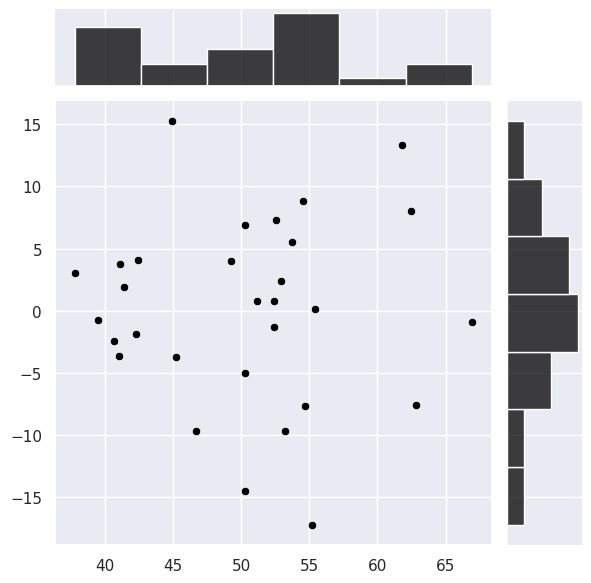

In [ ]:
# 잔차의 산포도
# 잔파의 산포도는 랜덤이어야 한다.(선형 어떠한 상관관계를 보이지 않는다)
sns.jointplot(x = lm_model.fittedvalues, y = resid,
              joint_kws={"color": "black"},
              marginal_kws={"color": "black"})

In [ ]:
lm_model.fittedvalues

0     50.301481
1     53.745905
2     42.264491
3     55.200217
4     46.703971
5     37.825011
6     44.943488
7     54.511333
8     52.444678
9     41.116350
10    54.664418
11    49.229882
12    53.210106
13    52.444678
14    41.039807
15    52.597764
16    45.249659
17    61.782895
18    55.429846
19    50.301481
20    42.417577
21    50.301481
22    51.143451
23    40.657093
24    66.911259
25    52.903935
26    62.854493
27    41.422521
28    62.471779
29    39.508952
dtype: float64

### Q-Q Plot
- 이론상의 분위점과 실제 데이터의 분위점을 산포도 그래프로 그린 것을 Q-Q plot 이라고 한다.

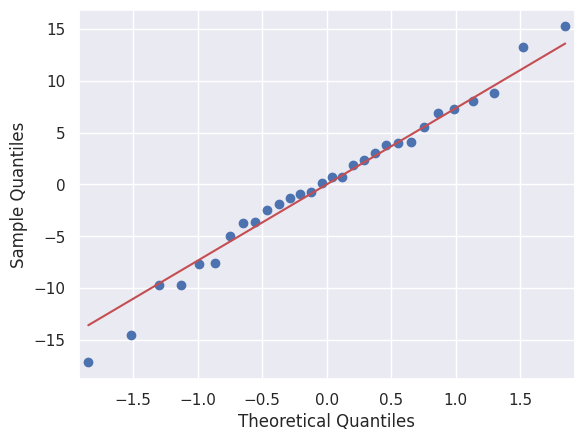

In [ ]:
# " line = 's' " 라고 파라미터를 적용함으로써 잔차가 정규분포를 따르면
# 이 직선상에 위치한다는 기준을 표시해준다.
fig = sm.qqplot(resid, line = "s")

In [ ]:
# 데이터 정렬 - 오름차순
resid_sort = resid.sort_values()
resid_sort.head()

3    -17.200217
21   -14.501481
12    -9.710106
4     -9.703971
10    -7.664418
dtype: float64

In [ ]:
# 누적확률분포의 최하위 위치 (1/sample size + 1)
1 / 31

0.032

In [ ]:
# 누적분포함수(CDF: Cumulative Distribution Function)
nobs = len(resid_sort)
cdf = np.arange(1, nobs + 1) / (nobs + 1)
cdf

array([0.032, 0.065, 0.097, 0.129, 0.161, 0.194, 0.226, 0.258, 0.29 ,
       0.323, 0.355, 0.387, 0.419, 0.452, 0.484, 0.516, 0.548, 0.581,
       0.613, 0.645, 0.677, 0.71 , 0.742, 0.774, 0.806, 0.839, 0.871,
       0.903, 0.935, 0.968])

In [ ]:
# 정규분포의 퍼센트포인트
ppf = stats.norm.ppf(cdf)
ppf

array([-1.849, -1.518, -1.3  , -1.131, -0.989, -0.865, -0.753, -0.649,
       -0.552, -0.46 , -0.372, -0.287, -0.204, -0.122, -0.04 ,  0.04 ,
        0.122,  0.204,  0.287,  0.372,  0.46 ,  0.552,  0.649,  0.753,
        0.865,  0.989,  1.131,  1.3  ,  1.518,  1.849])

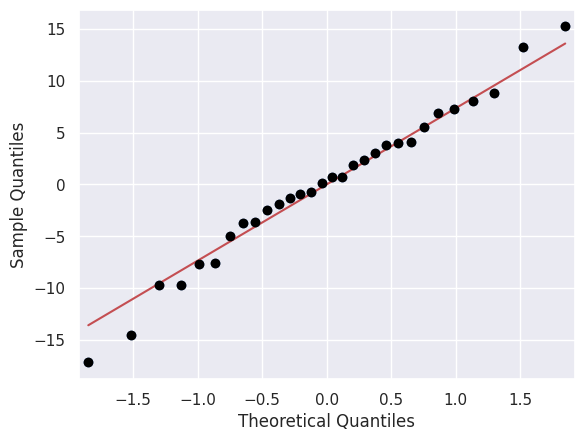

In [ ]:
# 정규분포의 퍼센트포인트와 잔차의 정규분포 확인
fig = sm.qqplot(resid, line = "s")

plt.plot(stats.norm.ppf(cdf), resid_sort, "o", color = "black")

### summary 함수의 출력으로 보는 잔차 체크

In [ ]:
# 결괏값의 마지막 세 번재 표에 주목 (Omnibus ~ Cond. No.)
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           1.11e-05
Time:                        13:52:38   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Prob(Omnibus) 와 Prob(JB)는 잔차의 정규성에 대한 검정 결과이다.
  - 귀무가설: 잔차가 정규분포를 따른다.
  - 대립가설: 잔차가 정규분포와 다르다.
- Skew(왜도): 히스토그램의 좌우비대칭 방향과 그 정도를 측정하는 지표
  - 정규분포는 좌우대칭이므로 정규분포의 왜도는 '0'이다.
  - 왜도가 0보다 크면 오른쪽 자락이 길어진다.
- Kurtosis(첨도): 첨도는 히스토그램 중심부의 뾰족함을 측정하는 지표다
  - 값이 클수록 히스토그램의 가운데 부분이 뾰족해진다.
  - 정규분포의 첨도는 '3'이다
- Durbin-Watson: Durbin-Watson 은 잔차의 자기상관을 체크하는 지표이다.
  - 이 지표가 '2' 전후 (보통 1.5~2.5 사이) 라면 문제 없다고 판단한다.
  - 잔차의 자기상관이 있으면 계수의 t검정 결과를 신뢰할 수 없게 된다.

## 분산분석
- 이 절에서 종복변수로 맥주 매상을,독립변수로 날씨만을 사용한다.
  - 여기서 날씨는 흐름, 비, 맑음의 3가지 수준을 가진다.
- 분산분석은 평균값의 차이를 검정하는 방법이다. 평균값의 차이 검정은 보통 t검정을 이용하는 것이 간단하지만, 세 개 이상의 수준 간의 평균값에 차이가 있는지 검정 할대에는 t검정을 사용하지 못하고 분산분석을 사용한다.
  - t검정에서 평균값 차이를 검정하는 예는 약을 먹기 전과 먹은 후라는 두 개 수준 간의 평균값의 차이를 검정할 때 활용한다.
- 분선분석은 모집단이 정규분포를 따르는 데이터에 대해서만 적용할 수 있다.
- 분산분석에서는 데이터의 변동을 '오차'와 '효과'로 분리한다. 그리고 'F비'라 부르는 통계량을 계산한다.
  - F비 = 효과의 분산크기 / 오차의 분산크기
  - 효과는 날씨에 따른 맥주 매상의 변동(분산)
  - 오차는 날씨라는 변수를 이용해서 설명할 수 없는 맥주 매상의 변동(분산)
  - 즉, 'F비'는 날씨에 의한 맥주매상 변동(분산) / 날씨가 아닌 영향에 의한 맥주매상 변동(분산)
  - 따라서, 'F비'가 크다는 뜻은 오차(설명할 수 없는 변동)에 비해 설명할 수 있는 변동(날씨)의 영향이 더 클 것이라고 판단할 수 있다.

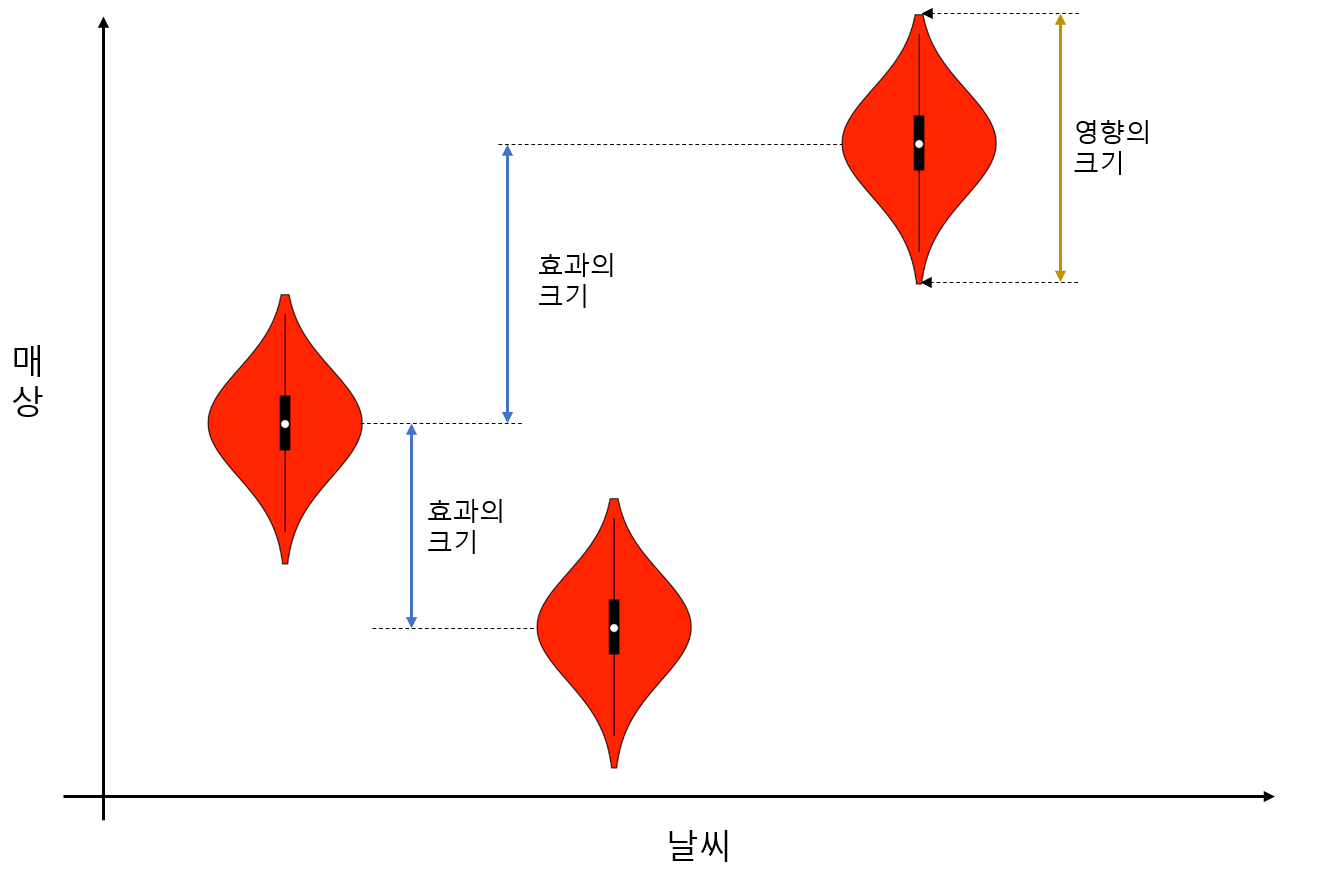

### 데이터 작성과 표시

In [ ]:
# 샘플 데이터
weather = [
    "cloudy","cloudy",
    "rainy","rainy",
    "sunny","sunny"
]
beer = [6,8,2,4,10,12]

# 데이터프레임 변환
weather_beer = pd.DataFrame({
    "beer"   : beer,
    "weather": weather
})
print(weather_beer)

   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny


<Axes: xlabel='weather', ylabel='beer'>

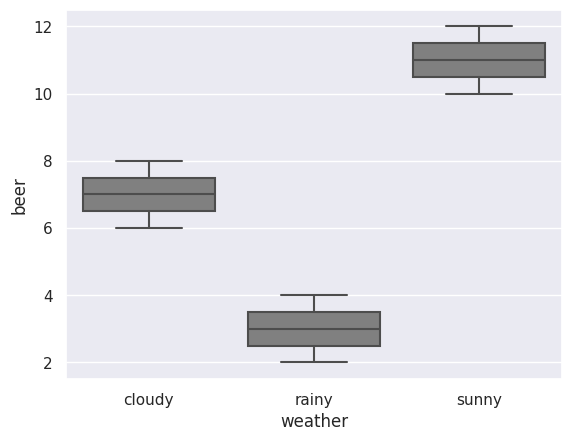

In [ ]:
# BoxPlot
sns.boxplot(x = "weather",y = "beer",
            data = weather_beer, color='gray')

In [ ]:
# 날씨 별 맥주 매상 평균
print(weather_beer.groupby("weather").mean())

         beer
weather      
cloudy    7.0
rainy     3.0
sunny    11.0


### 분산분석(1): 군간 제곱과 군내 제곱 계산
- 군간은 맑음, 흐림, 비 간을 뜻한다.
- 군내는 맑음(또는 흐림, 비) 의 오차를 뜻한다.

In [ ]:
# 날씨에 의한 영향
effect = [7,7,3,3,11,11]

In [ ]:
# 군간 제곱합
mu_effect = sp.mean(effect)
squares_model = sp.sum((effect - mu_effect) ** 2 )
squares_model

<ipython-input-44-ea3eb0256498>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mu_effect = sp.mean(effect)
<ipython-input-44-ea3eb0256498>:3: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  squares_model = sp.sum((effect - mu_effect) ** 2 )


64.0

In [ ]:
# 오차 (원 매상 데이터에서 효과를 뺀 값)
resid = weather_beer.beer - effect
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [ ]:
# 군내 편차 제곱합
squares_resid = sp.sum(resid ** 2)
squares_resid

<ipython-input-46-7666d6cccce0>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  squares_resid = sp.sum(resid ** 2)


6

### 분산분석(2): 군간 제곱과 군내 제곱 계산
- 표본분산을 계산할 때와 마찬가지로 편차 제곱합을 샘플사이즈로 나눌때 자유도(N-1)를 이용했다.
- 이와 마찬가지로 분산분석에서도 자유도를 이용한다.
  - 군간변동의 자유도: 3 (수준(날씨)의 종류 수: 맑음, 흐림, 비) - 1 = 2
  - 군내변동의 자유도: 6 (샘플사이즈) - 3 (수준의 종류 수) = 3

In [ ]:
df_model = 2 # 군간변동의 자유도
df_resid = 3 # 군내변동의 자유도

In [ ]:
# 군간 평균제곱(분산)
# 군간 제곱합 / 군간변동의 자유도
variance_model = squares_model / df_model
variance_model

32.0

In [ ]:
# 군내 평균제곱(분산)
# 군내 제곱합 / 군내변동의 자유도
variance_resid = squares_resid / df_resid
variance_resid

2.0

### 분산분석(3): p값 계산
- F비 = 효과의 분산크기 / 오차의 분산크기 = 군간 분산 / 군내 분산

In [ ]:
# F비
f_ratio = variance_model / variance_resid
f_ratio

16.0

In [ ]:
# p-value
# 1- cdf('F비', 군간 자유도, 군내 자유도)
1 - sp.stats.f.cdf(x=f_ratio,dfn=df_model,dfd=df_resid)

0.02509457330439091

- p-value 가 0.05 이하 이므로 날씨에 의해 맥주 매상이 유의미하게 변화한다고 판단할 수 있다.
- 정리:
  - 분산분석에서는 데이터를 효과의 크기와 오차의 크기로 분리한다.
  - 그리고 각각의 크기를 분산으로 정량화한다.
  - 효과의 크기를 군간변동, 오차의 크기를 군내변동이라 한다.
  - 군간 분산과 군내 분산의 비율, 즉, F비를 통계량으로 사용한다.
  - 모집단이 등분산 정규분포를 따를 때 F비는 F분포를 따른다는 것으로 밝혀져 있으므로, F분포의 누적분포함수에서 p-value 를 계산하고, 그 값이 0.05 이하인지 판정한다.


### statsmodels 를 이용한 분산분석

In [ ]:
# 정규 선형모델 구축
anova_model = smf.ols("beer ~ weather",
                      data = weather_beer).fit()

In [ ]:
# 분산분석 결과
# sum_sq 는 각 군간 제곱합, 군내 제곱합을 나타낸다.
# df 는 군간 자유도와 군내 자유도를 나타낸다.
# anova_lm 명령에서는 typ 인수를 2로 지정하면 하나 하나의 변수를 뺀 축소 모형에서의 F 검정값을 한꺼번에 계산할 수 있다. (모델에서 독립변수를 줄어들면서 증가하는 잔차제곱합을 계산)
# Type 2 ANOVA 검정 방식이며, 독립변수의 순서를 바꾸어도 분산분석 결과(F비 및 독립변수의 p-value)가 바뀌지 않는다.
print(sm.stats.anova_lm(anova_model, typ=2))

          sum_sq   df     F    PR(>F)
weather     64.0  2.0  16.0  0.025095
Residual     6.0  3.0   NaN       NaN


### 모델의 계수 해석

In [ ]:
# intercept 는 상수항으로 여기서는 wether 값에 있지 않은 흐림(cloudy)에 대응한다.
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

### 모델을 사용해서 오차와 효과 분리하기

In [ ]:
# 아래 값은 각 날씨의 평균값과 일치한다.
fitted = anova_model.fittedvalues
fitted

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

In [ ]:
# 잔차
# 적용한 결괏값과 실제 데이터의 차이가 잔차이다.
anova_model.resid

0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64

### 회귀모델의 분산분석
- 앞서 살펴본 데이터는 카테고리형 데이터를 이용했다.
- 하지만, 분산분석이라는 검정 방법은 일반선형모델에서 일반적으로 사용할 수 있다.
  - 이는 독립변수가 연속형 데이터여도 상관없다.
  - 독립변수가 연속형 데이터인 경우 군간변동, 군내변동이라는 용어는 잘 사용되지 않는다.
  - 군간변동의 자유도를 '모델의 자유도' 라고 한다.
  - 군내변동의 자유도를 '잔차의 자유도' 라고 한다.
    - 모델의 자유도는 추정된 파라미터 수에서 1을 뺀 값이다.
      - 독립변수가 카테고리형이었을 때는 수준의 개수(카테고리 종류 수)에서 1을 뺀 것과 같은 의미이다.
      - 단순회귀모델의 계수는 절편과 기울기 2개 뿐이므로 자유도는 '1'이 된다.
      - 잔차의 자유도는 샘플사이즈에서 추정된 파라미터 수를 뺀것으로 샘플사이즈가 30이면 2를 뺀 28이 잔차의 자유도가 된다.

In [ ]:
# 데이터 불러오기
beer = pd.read_csv("/content/drive/MyDrive/StatsCraftLab/practice/data/5-1-1-beer.csv")

# 모델 추정
lm_model = smf.ols(formula = "beer ~ temperature",
                   data = beer).fit()

In [ ]:
df_lm_model = 1  # 모델의 자유도(독립변수의 개수 + 절편 - 1)
df_lm_resid = 28 # 잔차의 자유도(샘플사이즈 - 2(독립변수의 개수 + 절편))

In [ ]:
# 모델을 적용한 값 (각 독립변수의 평균)
lm_effect = lm_model.fittedvalues
# 잔차
lm_resid = lm_model.resid
# 기온의 효과의 크기
mu = sp.mean(lm_effect)
squares_lm_model = sp.sum((lm_effect - mu) ** 2)
variance_lm_model = squares_lm_model / df_lm_model
# 잔차의 크기
squares_lm_resid = sp.sum((lm_resid) ** 2)
variance_lm_resid = squares_lm_resid / df_lm_resid
# F비
f_value_lm = variance_lm_model / variance_lm_resid
f_value_lm

<ipython-input-59-91efdf0bcc8e>:6: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mu = sp.mean(lm_effect)
<ipython-input-59-91efdf0bcc8e>:7: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  squares_lm_model = sp.sum((lm_effect - mu) ** 2)
<ipython-input-59-91efdf0bcc8e>:10: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  squares_lm_resid = sp.sum((lm_resid) ** 2)


28.44698368850464

In [ ]:
# F비를 이용해서 p-value 계산
1 - sp.stats.f.cdf(
    x=f_value_lm,dfn=df_lm_model,dfd=df_lm_resid)

1.1148907825053733e-05

In [ ]:
# 모델을 이용한 분산분석표
print(sm.stats.anova_lm(lm_model, typ=2))

                  sum_sq    df          F    PR(>F)
temperature  1651.532489   1.0  28.446984  0.000011
Residual     1625.582178  28.0        NaN       NaN


In [ ]:
# summary
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           1.11e-05
Time:                        13:52:39   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- F-statistic: F비
- Prob (F-statistic)은 분산분석의 p-value
- 독립변수가 1개인 경우에는 계수의 t검정 결과와 분산분석의 결과가 일치한다.
  - 독립변수가 늘어나면 일치하지 않게 된다.

## 독립변수가 여럿인 모델
- 독립변수가 여럿인 모델에서는 습도, 기온, 날씨, 가격이라는 독립변수를 사용한다.
- 날씨는 카테고리형 변수이며, 그 외에는 연속형 변수이다.
- 분산분석 Type 2 ANOVA 검정 방법을 사용한다.
  - 복수의 독립변수가 있을 경우 그 변수들의 유의미함을 판정해본다.

### 분석준비

In [ ]:
# 매상 데이터 불러오기
sales = pd.read_csv("/content/drive/MyDrive/StatsCraftLab/practice/data/5-3-1-lm-model.csv")
print(sales.head(3))

   humidity  price  sales  temperature weather
0      29.5    290  229.7         17.8   rainy
1      38.1    290  206.1         26.1   rainy
2      31.5    290  202.5         22.0   rainy


### 데이터로 그래프 그리기

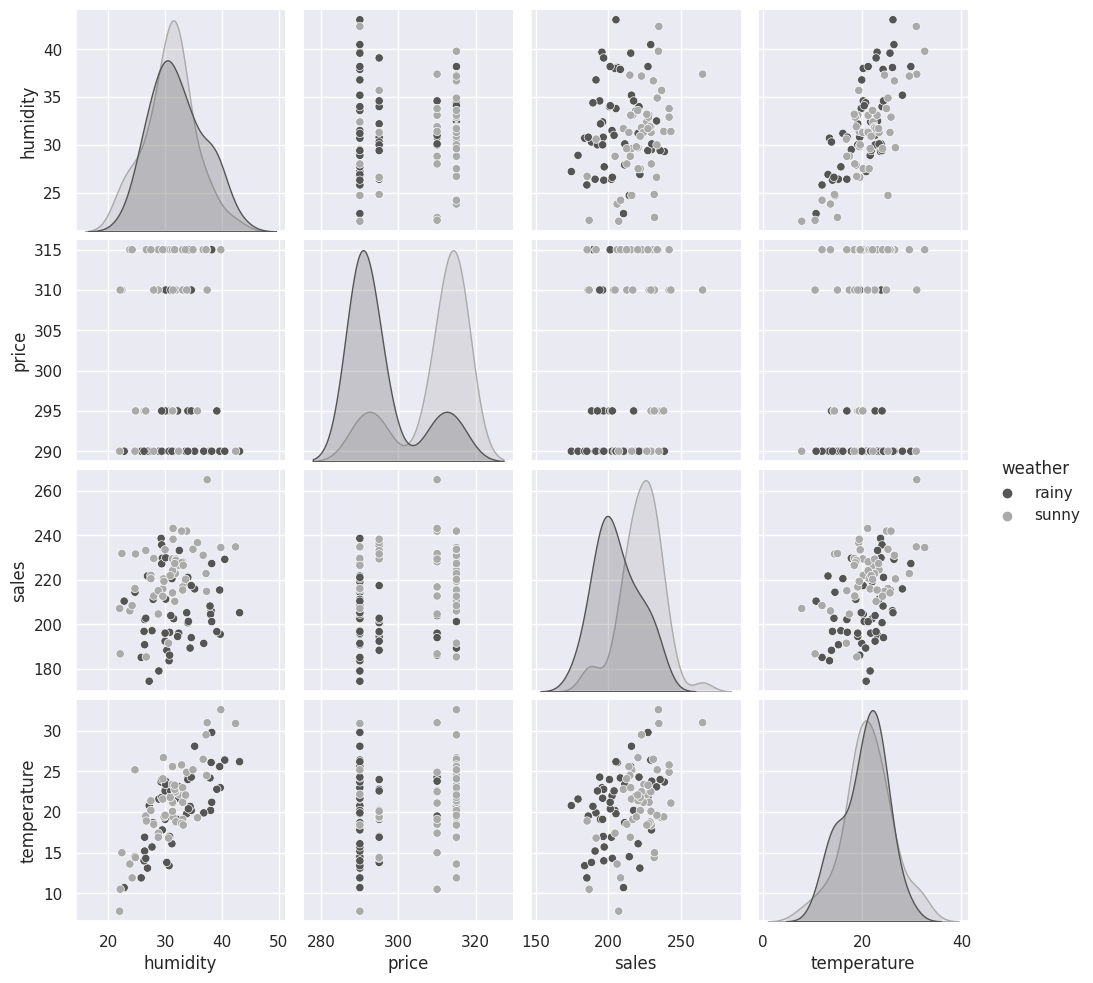

In [ ]:
sns.pairplot(data = sales, hue = "weather",
             palette="gray")

### 나쁜 분석 예: 변수가 1개인 모델 만들기

In [ ]:
# 단순회귀 모델 구현
lm_dame = smf.ols("sales ~ price", sales).fit()
lm_dame.params

Intercept    113.645406
price          0.332812
dtype: float64

In [ ]:
# 'price' 변수의 F비 및 p-value 확인
print(sm.stats.anova_lm(lm_dame, typ=2))

                sum_sq    df         F    PR(>F)
price      1398.392322   1.0  4.970685  0.028064
Residual  27570.133578  98.0       NaN       NaN


- 매상 데이터와 여러 독립변수로 이루어진 회귀 분석 에서 독립변수를 하나만 선택했다고 가정해보자.
- 단순회귀모델로 모델을 구현한다.
  - 'price'의 계수가 양수가 된다. 그리고 p-value 또한 0.05 이하로 검정되어 가격이 오르면 매상이 오른다는 결론에 도달하는 오류를 범한다.

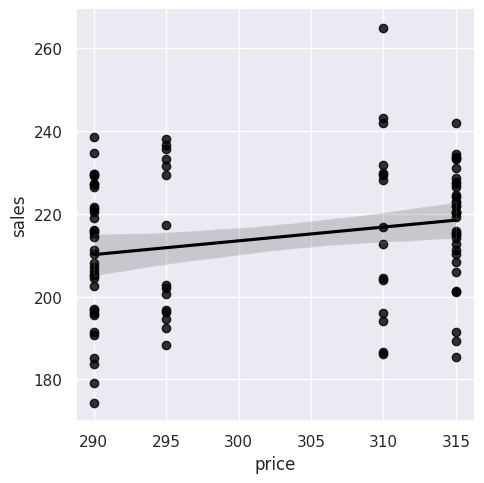

In [ ]:
# 매상을 상품가격으로 설명하는 회귀직선
sns.lmplot(x = "price", y = "sales", data = sales,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

### 독립변수 간의 관계 조사하기

In [ ]:
# 날씨별 평균값 집계
print(sales.groupby("weather").mean())

         humidity  price    sales  temperature
weather                                       
rainy      32.126  295.5  205.924       20.422
sunny      30.852  309.5  222.718       21.102


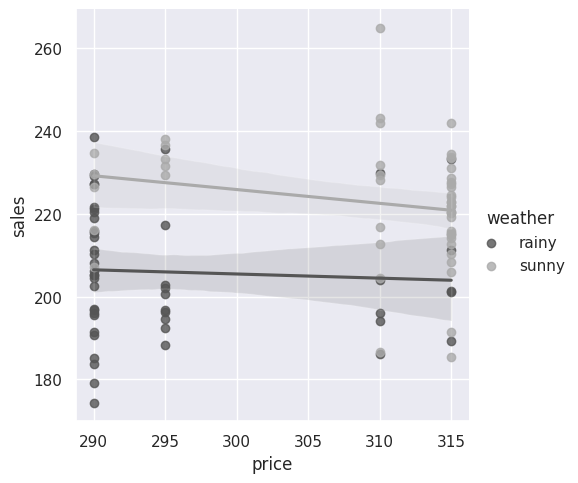

In [ ]:
# 날씨별로 본 매상과 상품 가격의 회귀직선
sns.lmplot(x = "price", y = "sales", data = sales,
           hue="weather", palette='gray')

- 위 그래프를 보면 맑은 날 쪽이 비오는 날 보다 높은 매상을 보여준다.
- 날씨별로 보면 가격이 높아지면 매상이 줄어든다는 것을 알 수 있다.
- 독립변수를 가격만 놓고 봤을 때와는 반대의 결론에 도달한다.

### 복수의 독립변수를 가지는 모델

In [ ]:
# 복수의 독립변수를 가진 모델을 추정
lm_sales = smf.ols(
    "sales ~ weather + humidity + temperature + price",
    data=sales).fit()
# 추정된 결과
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

- 위 계수 결과를 보면 가격('price') 오르면 매상('sales') 는 떨어진다는 것을 알 수 있다.
  - 가격('price') 의 계수가 음수

### 나쁜 분석 예: 일반적인 분산분석으로 검정하기
- 독립변수가 종속변수에 영향을 끼치고 있다고 말할 수 있는지 검정을 이용해 판단한다.
- 이 때 평범하게 (Type 1 ANOVA) 분산분석을 하는 것은 문제가 있다.
  - anova_lm 의 파라미터 type 을 1로 하면 일반적인 분산분석이 된다.

In [ ]:
# Type 1 ANOVA 분산분석 결과
print(sm.stats.anova_lm(lm_sales, typ=1).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
humidity      1.0   1779.601  1779.601   9.805   0.002
temperature   1.0   2076.845  2076.845  11.443   0.001
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


In [ ]:
# 독립변수(설명변수)의 순서변경
lm_sales_2 = smf.ols(
    "sales ~ weather + temperature + humidity + price",
    data=sales).fit()
# 순서가 변경된 Type 1 ANOVA 분산분석 결과
print(sm.stats.anova_lm(lm_sales_2, typ=1).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
temperature   1.0   3814.779  3814.779  21.018   0.000
humidity      1.0     41.667    41.667   0.230   0.633
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


- 첫 번째('lm_slaes') 분산분석 검정 결과 모든 독립변수가 유의미한 것처럼 되어 있다.
- Tytpe 1 ANOVA 는 독립변수를 넣는 순서를 바꾸면 검정 결과가 바뀐다.
- 두 번쨰('lm_sales_2) 분산분석의 검정 결과가 달라진다.
  - 두 번째 분산분석에서 독립변수의 순서를 '기온(temperature)' 과 '습도(humidity)' 를 바 꾸었다.
  - 물론 순서를 바꾸어도 계수(Coef) 는 바뀌지 않지만, F비와 p-value 값이 바뀐다.
  - 따라서, 검정 결과가 일치하지 않게 된다.

### 회귀계수의 t검정
- 분산분석(anova_lm) 대신 회귀계수의 t검정(summary)을 하면 앞과 같은 문제는 일어나지 않는다.
  - 독립변수 순서를 바꿨을 때, F비와 p-value 값이 변하는 문제

In [ ]:
# summary 의 독립변수 테이블
# 모델: lm_sales
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [ ]:
# summary 의 독립변수 테이블
# 모델: lm_sales_2
lm_sales_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


### Type 2 ANOVA
- 독립변수를 넣는 순서를 바꾸어도 검정 결과가 변하지 않는 분산분석을 Type 2 ANOVA 라고 한다.

### 모델 선택과 분산분석
- 독립변수를 가지는 모델에 대한 Type 1 ANOVA 의 계산방법으로 검정
- 변수를 1개씩 늘려가면서 확인

In [ ]:
# 독립변수가 없는 Null 모델의 잔차제곱합
mod_null = smf.ols("sales ~ 1", sales).fit()
resid_sq_null = sp.sum(mod_null.resid ** 2)
resid_sq_null

<ipython-input-75-66e85bf3e869>:3: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  resid_sq_null = sp.sum(mod_null.resid ** 2)


28968.525899999993

In [ ]:
# 독립변수 날시만 넣은 모델의 잔차제곱합
mod_1 = smf.ols("sales ~ weather", sales).fit()
resid_sq_1 = sp.sum(mod_1.resid ** 2)
resid_sq_1

<ipython-input-76-a2887ffa7a32>:3: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  resid_sq_1 = sp.sum(mod_1.resid ** 2)


21917.565

In [ ]:
# 잔차제곱합의 차
resid_sq_null - resid_sq_1

7050.960899999995

In [ ]:
# 잔차제곱합의 차는 분산분석 표에서도 확인할 수 있다.
# 날씨의 변화에 따른 군간 편차제곱합은
# 모델에 날씨라는 독립변수를 추가하는 것으로 (Null 모델에서 날씨 변수를 추가) 인해 감소하는 잔차제곱합과 일치한다.
print(sm.stats.anova_lm(mod_1).round(3))

            df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  31.527     0.0
Residual  98.0  21917.565   223.649     NaN     NaN


In [ ]:
# 날씨 + 습도 모델의 잔차제곱합
mod_2 = smf.ols(
    "sales ~ weather + humidity", sales).fit()
resid_sq_2 = sp.sum(mod_2.resid ** 2)
resid_sq_2

<ipython-input-79-275c626f71ab>:4: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  resid_sq_2 = sp.sum(mod_2.resid ** 2)


20137.963897851758

In [ ]:
# 날씨만 있는 모델의 잔차제곱합에서 '날씨 + 습도' 변수가 들어간 모델의 잔차제곱합을 뺀다.
resid_sq_1 - resid_sq_2

1779.601102148241

In [ ]:
# 마찬가지로 잔차제곱합의 차이는 분산분석표에서도 나타난다.
# sum_sq 열의 humidity 행이다.
print(sm.stats.anova_lm(mod_2).round(3))

            df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  33.963   0.000
humidity   1.0   1779.601  1779.601   8.572   0.004
Residual  97.0  20137.964   207.608     NaN     NaN


- 예를 들어 humidity 의 F비는 1779.604 / 207.608 로 계산할 수 있다.
- 분모는 언제나 오차의 크기(207.608)를 사용하므로 wather 의 F비는 7050.960 / 207.608 로 계산할 수 있다.
- 즉, 분산분석은 독립변수 1개씩 늘려나가며, 독립변수가 늘어남으로써 감소했던 잔차제곱합의 크기를 기반으로 독립변수 효과의 크기를 정량화하게 된다.
- 따라서, 이 방법이라면 독립변수를 추가하는 순서가 큰 의미를 가지게 된다.

In [ ]:
# 날씨 + 기온 모델의 잔차제곱합
mod_2_2 = smf.ols(
    "sales ~ weather + temperature", sales).fit()
resid_sq_2_2 = sp.sum(mod_2_2.resid ** 2)
resid_sq_2_2

<ipython-input-82-3e9c6f3e9f19>:4: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  resid_sq_2_2 = sp.sum(mod_2_2.resid ** 2)


18102.78642671222

In [ ]:
# 날씨 + 기온 + 습도 모델의 잔차제곱합
mod_3_2 = smf.ols(
    "sales ~ weather + temperature + humidity",
    sales).fit()
resid_sq_3_2 = sp.sum(mod_3_2.resid ** 2)
resid_sq_3_2

<ipython-input-83-d8ad3a8f2dc2>:5: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  resid_sq_3_2 = sp.sum(mod_3_2.resid ** 2)


18061.119361588426

In [ ]:
# 잔차제곱합의 차이를 구하면 '날씨 + 기온' 모델에 습도를 추가함으로써 감소한 잔차제곱합을 구할 수 있다.
resid_sq_2_2 - resid_sq_3_2

41.6670651237946

In [ ]:
print(sm.stats.anova_lm(mod_3_2).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  37.478   0.000
temperature   1.0   3814.779  3814.779  20.277   0.000
humidity      1.0     41.667    41.667   0.221   0.639
Residual     96.0  18061.119   188.137     NaN     NaN


- 위 분산분석표를 보면 날씨만 있던 모델에 습도를 추가했을 때의 잔차제곱합의 감소량과 비교했을 때 작다는 점이 중요하다.
  - 이는 습도 효과의 크기가 작다는 의미이다.
- 정리:
  - 복수의 독립변수를 가지는 경우 분산분석은 독립변수를 1개씩 늘려나가서 독립변수가 늘어남으로써 감소한 잔차제곱합의 크기에 기반하여 독립변수가 가지는 효과의 크기(분산분석표에서 sum_sq)를 계산한다.
  이 방법이라면 독립변수를 추가하는 순서에 따라서 sum_sq 값의 크기가 크게 바뀌게 된다.

### Type II ANOVA
- Type 1 ANOVA 는 변수를 하나씩 추가함으로써 추가 전 모델과 추가 후 모델의 잔차제곱합을 비교하면서 독립변수의 유의미함을 검정한다.
- Type 2 Anova 는 독립변수가 줄어든면서 증가하는 잔차제곱합의 크기에 기반해서 독립변수가 갖는 효과의 크기를 정량화하고 있다.
  - 이런 방식이라면 변수를 추가하는 순서를 바꾸어도 검정 결과는 달라지지 않는다.

In [ ]:
# 모든 변수가 포함된 모델의 잔차제곱합
mod_full = smf.ols(
    "sales ~ weather + humidity + temperature + price",
    sales).fit()
resid_sq_full = sp.sum(mod_full.resid ** 2)
resid_sq_full

<ipython-input-86-ab0d30c6aee3>:5: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  resid_sq_full = sp.sum(mod_full.resid ** 2)


17242.716942366478

In [ ]:
# 습도를 제거한 모델의 잔차제곱합
mod_non_humi = smf.ols(
    "sales ~ weather + temperature + price",
    sales).fit()
resid_sq_non_humi = sp.sum(mod_non_humi.resid ** 2)
resid_sq_non_humi

<ipython-input-87-74240d6689cc>:5: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  resid_sq_non_humi = sp.sum(mod_non_humi.resid ** 2)


17299.142016107653

In [ ]:
# 모든 변수를 포함한 모델의 잔차제곱합 - 습도를 제거한 모델의 잔차제곱합
resid_sq_non_humi - resid_sq_full

56.425073741174856

In [ ]:
# Type II ANOVA (anova_lm 의 파라미터 typ = 2)
print(sm.stats.anova_lm(mod_full, typ=2).round(3))

                sum_sq    df       F  PR(>F)
weather       5845.878   1.0  32.208   0.000
humidity        56.425   1.0   0.311   0.578
temperature   2378.017   1.0  13.102   0.000
price          818.402   1.0   4.509   0.036
Residual     17242.717  95.0     NaN     NaN


In [ ]:
# 모든 변수를 포함시킨 모델과 습도를 제거한 모델의 비교값을 출력하는 함수 사용
# compare_f_test
# 습도 변수의 F비, p-value, 2개 모델의 자유도 차이
mod_full.compare_f_test(mod_non_humi)

(0.3108780375696364, 0.578453342712073, 1.0)

- 위 분산분석 표 또는 compare_f_test 함수를 이용해 'humidity(습도)' 변수가 매상에 유의미한 영향을 끼친다고 볼 수 없다는 것을 판단할 수 있다.
- 습도는 기온과 강한 상관관계를 가지고 있다.
- 그렇다면, 기온이라는 독립변수가 모델에 포함되어 있으면 습도는 매상에 영향을 끼친다고 볼 수 없게 되는 상황이 있을 수도있다.

### 변수 선택과 모델 해석

In [ ]:
# 습도를 뺀 모델(mod_non_humidity) 에서 분산분석 (Type 2 ANOVA) 수행
print(sm.stats.anova_lm(mod_non_humi, typ=2).round(3))

                sum_sq    df       F  PR(>F)
weather       6354.966   1.0  35.266   0.000
temperature   4254.736   1.0  23.611   0.000
price          803.644   1.0   4.460   0.037
Residual     17299.142  96.0     NaN     NaN


In [ ]:
mod_non_humi.params

Intercept           273.301800
weather[T.sunny]     20.393871
temperature           1.417860
price                -0.326001
dtype: float64

- 습도를 제거한 모델의 분산분석을 확인하면 유의미하지 않은 변수는 존재하지 않는다.
- 이것으로 변수 선택을 종료하고 이어서 계수를 확인한다.
  - 계수 확인(mod_non_humi.params)에서 weather[T.sunny]는 비오는 날과 비교하면 매상이 20증가 한다는 것을 알 수 있다.
- 잘못된 변수의 조합으로 모델링된 결과를 예측이나 해석에 사용하면 안 된다.
  - 예를 들어 독립변수에 가격만 넣은 모델의 계수를 사용하여 해석을 하면 잘못된 결론을 이끌어내게 된다.

### AIC를 이용한 변수 선택
- AIC는 분산분석처럼 계산 방법을 바꿀 필요가 없다. 단지 AIC를 비교할 뿐이다.
- 예를 들어 모든 변수를 포함한 모델인 mod_full 과 습도를 제외한 모델인 mod_non_humi 의 AIC 를 비교해 본다.

In [ ]:
print("모든 변수를 포함한 모델: ", mod_full.aic.round(3))
print("습도를 제외한 모델: ", mod_non_humi.aic.round(3))

모든 변수를 포함한 모델:  808.785
습도를 제외한 모델:  807.112
